In [1]:
import csv

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import scale
import numpy as np

print('opening file...')
with open('data/shapemap1000000.txt',"r") as f:
    # all_data=[x.split() for x in f.readlines()]
    all_data=[next(f).split() for i in range(3000000)]

    robotInput = np.array([[float(i) for i in x[0:3]] for x in all_data[::3]], dtype=float)

    coords = np.array([[float(i) for i in x] for x in all_data[2::3]], dtype=float)

print('finished opening')


                           
length = len(coords)

for x in range(length):
    for y in range(3):
        if(robotInput[x][y]<0):
            robotInput[x][y] = -robotInput[x][y]

               
train_data = coords[:length//5*4] # 80%
train_labels = robotInput[:length//5*4] # 80%

test_data = coords[length//5*4:] # last 20%
test_labels = robotInput[length//5*4:] # last 20%


print("Training set: {}".format(train_data.shape))  # xxx examples, 60 features
print("Testing set:  {}".format(test_data.shape))   # xxx examples, 60 features


def build_model():
    model = keras.Sequential([
        keras.layers.Dense(256, activation=tf.nn.relu,
                           input_shape=(train_data.shape[1],)),
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dense(3)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model


model = build_model()
model.summary()


# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.1, verbose=0,
                    callbacks=[early_stop, PrintDot()])
model.save('model'  + 'reverse1.h5')
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
             label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
             label = 'Val loss')
    plt.legend()
    plt.ylim([0, 1])
    plt.savefig('Error_Loss.png')
    plt.show()

plot_history(history)

# PERFORMANCE ON TEST SET

[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.5f}".format(mae))

# PREDICTION

test_predictions = model.predict(test_data)#.flatten()


test_trans = test_labels
predict_trans = test_predictions



plt.scatter(test_trans, predict_trans, s = 5)
plt.xlabel('Rotational Values []')
plt.ylabel('Predictions []')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


error_trans = predict_trans - test_trans


plt.hist(error_trans, bins = 50)
plt.legend(['X','Y','Z'])
plt.xlabel("Prediction Error []")
plt.ylabel("Count")
plt.show()




C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


opening file...
finished opening
Training set: (80000, 60)
Testing set:  (20000, 60)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               15616     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 147,971
Trainable params: 147,971
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
.................................................................................

<Figure size 640x480 with 1 Axes>

Testing set Mean Abs Error: $0.23969


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

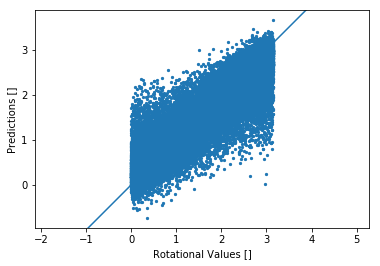

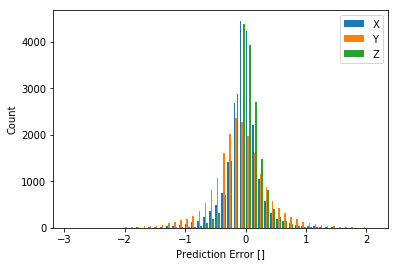

In [2]:
plt.scatter(test_trans, predict_trans, s=5)
plt.xlabel('Rotational Values []')
plt.ylabel('Predictions []')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()



plt.hist(error_trans, bins = 50)
plt.legend(['X','Y','Z'])
plt.xlabel("Prediction Error []")
plt.ylabel("Count")
plt.show()


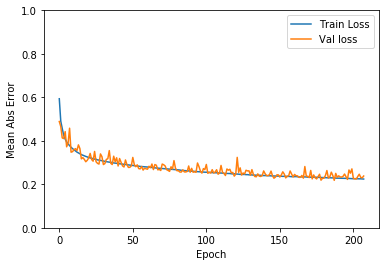

[0.12414975176453591, 0.12414975176453591]
Testing set Mean Squared Error: $0.1241497518


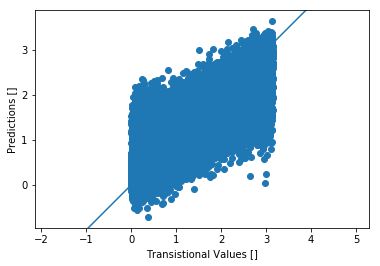

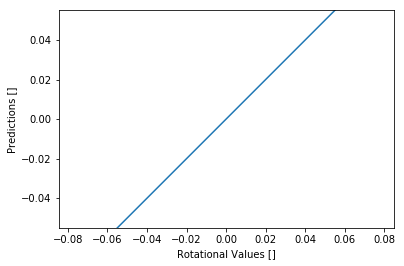

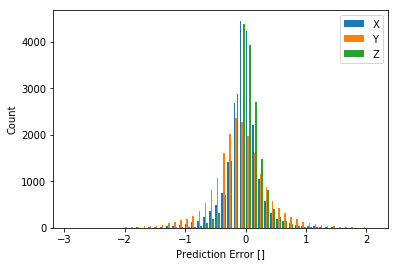

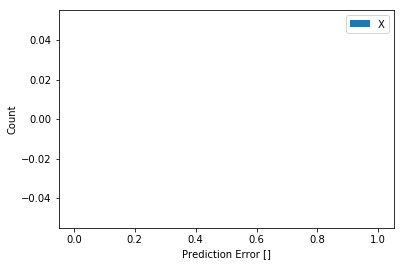

In [3]:

optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mse'])
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
             label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
             label = 'Val loss')
    plt.legend()
    plt.ylim([0, 1])
    plt.show()

plot_history(history)

# PERFORMANCE ON TEST SET

[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print([loss,mae])
print("Testing set Mean Squared Error: ${:7.10f}".format(mae))

